<a href="https://colab.research.google.com/github/m0zzarella/Fundus-Imaging/blob/main/macula_segmentation4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2 as cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import glob
import os
from skimage import data, io, filters
from skimage.metrics import structural_similarity


In [5]:
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
%cd "/content/drive/MyDrive/macula_test"

/content/drive/MyDrive/macula_test


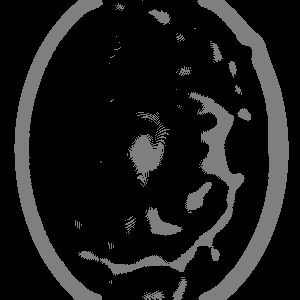

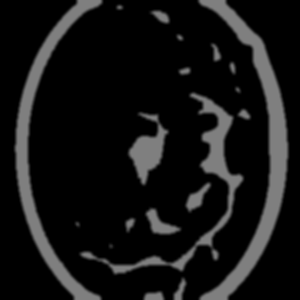

(150, 150)


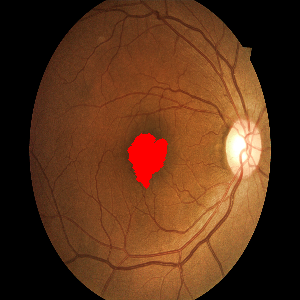

[]


In [56]:
file = "/content/01_test.jpeg"
import cv2
import numpy as np
import pywt
from scipy import ndimage
from numpy import asarray
from google.colab.patches import cv2_imshow


# Load the image
img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
img = cv2.resize(img,(300,300)) 

r,g,b = cv2.split(img) 
gray = cv2.bilateralFilter(g, 5, 17, 17)
#gray = gray[50:220, 85:220]

# Threshold the grayscale image to create a binary image
#ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(g,(31,31),5)

# Select a seed point in the binary image
thresh = cv2.adaptiveThreshold(blur,127,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,25,2)

seed_point = (150,150)
cv2_imshow(thresh)
kernel1 = np.ones((3,3), np.uint8)
kernel2 = np.ones((5,5), np.uint8)
disk = cv2.dilate(thresh, kernel1, iterations=2)
disk = cv2.erode(disk, kernel2, iterations=1)
disk = cv2.erode(disk, kernel1, iterations=1)
         
disk = cv2.GaussianBlur(disk,(5,5),1.5)
# Initialize a seed point to (0, 0)
cv2_imshow(disk)
print(seed_point)
#numpydata = asarray(disk)
 
# data
#print(numpydata)

#cv2.destroyAllWindows()
# Initialize an empty list to store the pixels that belong to the macula region
macula_pixels = []

# Add the seed point to the list of macula pixels
macula_pixels.append(seed_point)
for pixel in macula_pixels:
    x, y = pixel
    cv2.circle(img, (y, x), 2, (0, 0, 255), -1)
# Implement the region growing algorithm
while len(macula_pixels) > 0:
    # Get the current pixel from the list
    pixel = macula_pixels[0]
    x, y = pixel
    
    # Consider the 8-neighbors of the current pixel
    #neighbors = [(x-1, y-1), (x-1, y), (x-1, y+1), (x, y-1), (x, y+1), (x+1, y-1), (x+1, y), (x+1, y+1)]
    neighbors = [(x-1, y-1), (x, y-1), (x+1, y-1), (x-1, y), (x+1, y), (x-1, y+1), (x, y+1), (x+1, y+1)]
    # Add any black pixels to the list of macula pixels
    for neighbor in neighbors:
        x, y = neighbor
        if thresh[x][y] >= 127:
            macula_pixels.append(neighbor)
            thresh[x][y] = 0
    
    # Remove the current pixel from the list
  
    cv2.circle(img, (y, x), 2, (0, 0, 255), -1)
    macula_pixels.pop(0)
    #print(macula_pixels)


# Iterate through the list of macula pixels and mark each pixel with a red dot


# Display the original image with the macula region marked
cv2_imshow(img)
print(macula_pixels)